In [1]:
# import reqd libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [5]:
X = data.iloc[:,3:]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [9]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_t = scaler.fit_transform(X)
X_t = pd.DataFrame(X_t, columns = X.columns)
X_t

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [12]:
orignal_X = X.copy()
X = X_t.copy()

In [15]:
X.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [17]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [25]:
clusters = linkage(X, method='ward')

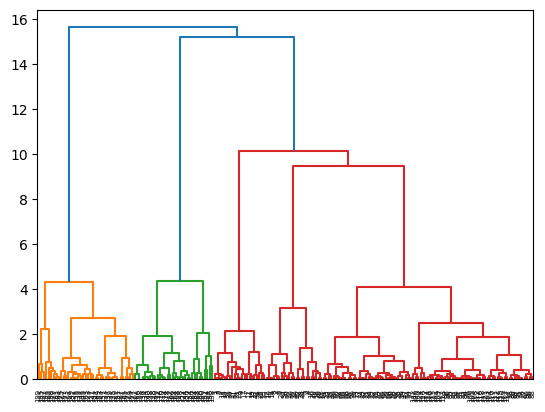

In [27]:
dendrogram(clusters)
plt.show()

In [12]:
# no_of_optimal_cluster = 5

In [29]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
pred = hc.fit_predict(X)


In [31]:
pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 0, 1, 0, 1,
       2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 2, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1], dtype=int64)

In [33]:
X['cluster'] = pred
X

,Annual Income (k$),Spending Score (1-100),cluster
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,0
197,2.497807,0.923953,1
198,2.917671,-1.250054,0


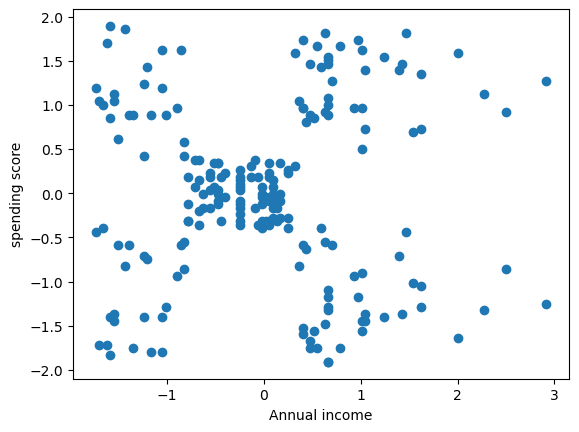

In [35]:
plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.show()

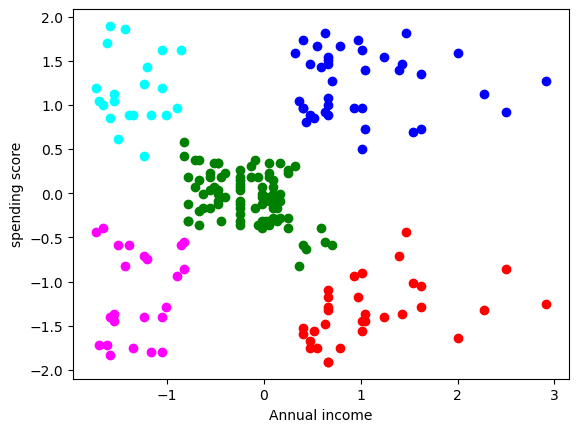

In [37]:
#plt.scatter(X.iloc[:,0],X.iloc[:,1])
plt.scatter(X.iloc[pred==0,0], X.iloc[pred==0,1], c='red')
plt.scatter(X.iloc[pred==1,0], X.iloc[pred==1,1], c='blue')
plt.scatter(X.iloc[pred==2,0], X.iloc[pred==2,1], c='green')
plt.scatter(X.iloc[pred==3,0], X.iloc[pred==3,1], c='cyan')
plt.scatter(X.iloc[pred==4,0], X.iloc[pred==4,1], c='magenta')

plt.xlabel('Annual income')
plt.ylabel('spending score')
plt.show()


##### Segmentation
* cluster:pink  = low inc  -> low spending
* cluster:red   = high inc -> low spending
* cluster:green = high inc -> high spending 
* cluster:bluw  = mid inc  -> mid spending
* cluster:cyan  = low inc  -> high spending


In [40]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X,pred)
print(score)

0.6683754206366562
